<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [162]:
# Set your student number
student_number = 98101339
Name = 'Sayeh'
Last_Name = 'Jarollahi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [163]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

In [ ]:
'''
each X_i can take 2 different values, so the random vector X1:784 can take 2^784 different values and there are 2^784
binary images
we need  (2^784)-1 X_i parameters to be able to specify an arbitrary probability distribution over all images. 
we know that the sum over probability of all images is one, so by having sum over (2^784)-1 images, the probability of the
last image is 1 - sigma(P(Image_i))
'''

In [ ]:
# extra space

Run below codes to load the network and its functions.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [76]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''
    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [77]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk


In [78]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [79]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

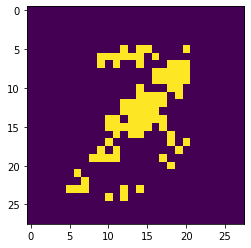

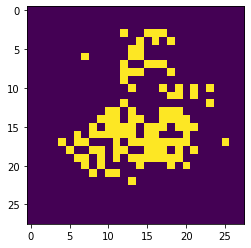

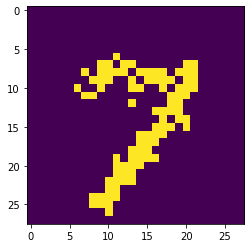

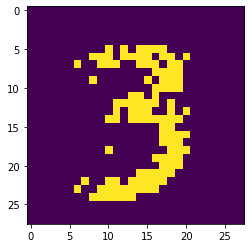

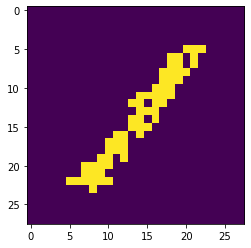

In [80]:
def create_images():
    z1_vals, z1_probs = [], []
    z2_vals, z2_probs = [], []
    for val, prob in bayes_net['prior_z1'].items():
        z1_vals.append(val)
        z1_probs.append(prob)
    for val, prob in bayes_net['prior_z2'].items():
        z2_vals.append(val)
        z2_probs.append(prob)
    for i in range(5):
        sample = get_bayesian_sample(z1_vals, z1_probs, z2_vals, z2_probs)
        convert_sample_to_image(sample)
        

def get_bayesian_sample(z1_vals, z1_probs, z2_vals, z2_probs):
    z1 = np.random.choice(z1_vals, 1, z1_probs)[0]
    z2 = np.random.choice(z2_vals, 1, z2_probs) [0]
    image = []
    for i in range(28*28):
        X_i_prob_condition_z1_z2 = get_p_xk_cond_z1_z2(z1, z2, i+1)
        value_X_i = np.random.choice([0, 1],p= [1 - X_i_prob_condition_z1_z2, X_i_prob_condition_z1_z2])
        image.append(value_X_i)
    return np.array(image)
    
def convert_sample_to_image(sample, width=28, height=28):
    image = sample.reshape(width, height)
    imgplot = plt.imshow(image)
    plt.show()

create_images()

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

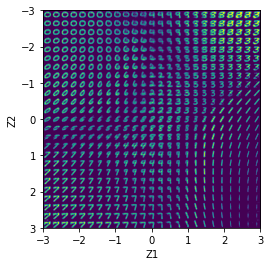

In [81]:
def get_all_expected_images():
    z1_values = sorted(list(bayes_net['prior_z1'].keys()))
    z2_values = sorted(list(bayes_net['prior_z2'].keys()))
    all_images = np.zeros(shape=(28*len(z2_values), 28*len(z1_values)))
    for i in range(len(z2_values)):
        for j in range(len(z1_values)):
            image = get_conditional_image_expected(z1_values[j], z2_values[i])
            set_parial_image(all_images, image, i, j)
    #convert_sample_to_image(all_images, 28*25, 28*25)
    plot_image(all_images)
    
def set_parial_image(all_images, image, i, j):
    # i is index of z2 and j is index of z1
    all_images [i*28:(i+1)*28, j*28:(j+1)*28] = image
    
def get_conditional_image_expected(z1, z2):
    sample = bayes_net['cond_likelihood'][(z1, z2)]
    sample = sample.reshape(28,28)
    return sample

def plot_image(image):
    imgplot = plt.imshow(image, extent = [-3, 3, 3, -3])
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.show()


get_all_expected_images()

In [82]:
# The intuitive role of Z2 seems to be roundness of the image. As Z2 grows, the roundness of the number in the images decrease.
#For example, when Z2=(-3) : number in images are 0, 4, 8. However, when Z2=3: number in images are 7, 1 that don't have a 
# round shape. 
# The intuitive role of Z1 is not completely clear, though. It seems that it is about the horizontal width. when Z1 amount
# increases, the horizontal length decreases. 

In [93]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

Start
end of training
end of test
-138.67476852673386 45.45178754499587


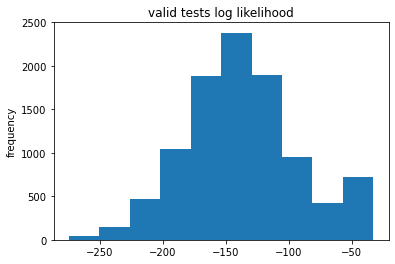

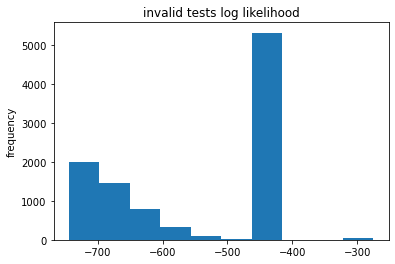

In [87]:
z1s = np.linspace(-3, 3, 25)
z2s = np.linspace(-3, 3, 25)

def get_X_condition_z1_z2():
    '''
     returns dict of shape {(z1_value, z2_value): X} 
    X is X1:784 when all elements are one 
    '''
    result = {}
    for z1 in z1s:
        for z2 in z2s:
            p_x_cond_z1_z2 = get_p_x_cond_z1_z2(z1, z2) 
            result.update({(z1, z2): p_x_cond_z1_z2})
    return result

def get_data_prob_log (sample, z1, z2, X_condition_z1_z2):
    '''
    returns P(X[1:784],z1,z2)
    '''
    pixel_prob = np.zeros(28*28)
    X_condition = X_condition_z1_z2[(z1, z2)]
    p_z1_z2 = get_p_z1(z1) * get_p_z2(z2)
    conditional_X_prob = np.where(sample ==1, X_condition, 1 - X_condition)
    return np.prod(conditional_X_prob) * p_z1_z2
    

def get_data_loglikelihood(all_data):
    X_condition_z1_z2 = get_X_condition_z1_z2()
    log_likelihood_prob = []
    result = np.zeros(len(all_data))
    for i, data in enumerate(all_data):
        #print(i)
        total_prob = []
        data_prob = [get_data_prob(data, z1, z2, X_condition_z1_z2) for z1 in z1s for z2 in z2s]
        total_prob = np.sum(np.array(data_prob))
        result[i] = np.log(total_prob if total_prob>0 else +1e-200)
    return result

def classify_data():
    print('Start')
    val_data_prob = get_data_loglikelihood(val_data)
    print('end of training')
    test_data_prob = get_data_loglikelihood(test_data)
    print('end of test')
    
    validation_mean = np.mean(val_data_prob)
    validation_std = np.std(val_data_prob)
    print(validation_mean, validation_std)
    
    valid_tests = np.abs(test_data_prob - validation_mean) <= (3 * validation_std)
    invalid_tests = test_data_prob[np.logical_not(valid_tests)] 
    valid_tests = test_data_prob [valid_tests]

    plot_histogram(valid_tests, title = 'valid tests log likelihood')
    plot_histogram(invalid_tests, title = 'invalid tests log likelihood')
    
def plot_histogram(data, title):
    plt.figure() 
    plt.hist(data)  
    plt.ylabel('frequency') 
    plt.title(title) 
    plt.show() 
    

classify_data()

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [3]:
############################################################
# import necessary packages in this cell                   #
# please set a random seed to get the same results in      #
# different runs (1 Points)                                #
############################################################
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(12)

In [4]:
A_CPT = {
    ():0.8
}
B_CPT = {
    (): 0.55
}
D_CPT = {
    (False, False) : 0.8,
    (True, False) : 0.5,
    (False, True) : 0.65,
    (True, True) : 0.67
}
C_CPT = {
    (False, False) : 0.7,
    (True, False) : 0.5,
    (False, True) : 0.15,
    (True, True) : 0.05
}
E_CPT = {
    (True, ): 0.3,
    (False, ): 0.9
}
F_CPT = {
    (True, ): 0.2,
    (False, ): 0.25   
}

In [142]:
class Node:
    
    def __init__(self, name:str, cpt:dict,  parents = []):
        """
        cpt dict only stores probabilities when current the Node value is True.
        {
        (parents values): probability of node being True,
        ...
        }
        if it has no parents, the tuple is empty but is still there!
        """
        self.name = name
        self.parents = parents
        self.cpt = cpt
        
    def get_conditional_pmf(self, value:bool, evidences:dict):
        """
        evidences is a dict that keys are node name and the values of dict are bool
        P(node=value|evidence)
        """
        total_prob = 0
        for cpt_evidence, prob in self.cpt.items():
            if self.is_evidence_seen(cpt_evidence, evidences):
                total_prob += prob
        return total_prob if value else 1 - total_prob
    
    def is_evidence_seen(self, cpt_evidence:tuple, evidences:dict)->bool:
        for index, parent in enumerate(self.parents):
            if isinstance(evidences[parent.name], tuple) and cpt_evidence[index] not in evidences[parent.name]:
                return False
            elif not isinstance(evidences[parent.name], tuple) and cpt_evidence[index] != evidences[parent.name]:
                return False
        return True
    
    def get_random_value(self, evidence):
        parents_values = [evidence[parent.name] for parent in self.parents]
        prob_1 = self.cpt[tuple(parents_values)]
        prob_0 = 1 - prob_1
        return random.choices([True, False],[prob_1, prob_0])[0]
        
class BN(object):
    """
    Bayesian Network implementation with sampling methods as a class
    
    Attributes
    ----------
    n: int
        number of variables
        
    all_nodes: dict of all nodes 
    it is a dict from name of node to node
    to be able to retrieve required node in o(1)
        Network representation as a dictionary. 
    """
    
    def __init__(self, n = 6) -> None:
        self.n = n
        self.topological_sort_nodes = []
        self.all_nodes = self.initialize_nodes()
        
    def initialize_nodes(self) -> dict:
        a = Node(name='a', cpt = A_CPT)
        b = Node(name='b', cpt = B_CPT)
        e = Node(name='e', parents = [b, ], cpt = E_CPT)
        c = Node(name='c', parents = [a,e], cpt = C_CPT)
        d = Node(name='d',parents = [a, c], cpt = D_CPT)
        f = Node(name='f', parents = [d,], cpt = F_CPT)
        self.topological_sort_nodes.extend([a, b, e, c, d, f])
        return {
            'a': a,
            'b': b,
            'c': c,
            'd': d,
            'e' : e,
            'f': f,
         
        }

    
    def cpt(self, node, value = 0) -> dict:
        """
        This is a function that returns cpt of the given node
        
        Parameters
        ----------
        node:
            a variable in the bayes' net
            
        Returns
        -------
        result: dict
        constants that are mentioned before 
        """
        return self.all_nodes[node].cpt
    
    def pmf(self, query, evidence) -> float:
        """
        This function gets a variable and its value as query and a list of evidences and returns probability 
        mass function P(Q=q|E=e)
        
        Parameters
        ----------
        query:
            a variable and its value
            e.g. ('a', 1)
        evidence:
            dict of variables and their values
            e.g. {'a': 1, 'b': 1}
        
        Returns
        -------
        PMF: float
            P(query|evidence)
        """
        return self.enumeration_ask(query[0], evidence)[query[1]]
        
    def enumeration_ask(self, query_name:str, evidence:dict):
        distribution = {}
        probability_sum = 0
        for query_value in [True, False]:
            evidence.update({query_name:query_value})
            enumeration_all_result = self.enumeration_all(self.topological_sort_nodes, 0, {**evidence, query_name:query_value})
            distribution.update({query_value: enumeration_all_result })
        return self.normalize(distribution)
    
    def normalize(self, distribution):
        total = sum(distribution.values())
        if not np.isclose(total, 1.0):
            for value, prob in distribution.items():
                distribution.update({value: prob/total})
        return distribution
    
    def enumeration_all(self, variables, current_index=0, evidence={}):
        if current_index == len(self.topological_sort_nodes):
            return 1.0
        var_name = self.topological_sort_nodes[current_index].name
        var_node = self.all_nodes[var_name]
        if var_name in evidence:
            conditional_pmf = var_node.get_conditional_pmf(evidence[var_name], evidence)
            return conditional_pmf * self.enumeration_all(variables, current_index+1, evidence)
             
        else:
            conditional_pmf_true = var_node.get_conditional_pmf(True, evidence) * self.enumeration_all(variables, current_index+1, {**evidence, var_name:True})
            evidence.update({var_name:(False, True)})
            conditional_pmf_false = var_node.get_conditional_pmf(False, evidence) * self.enumeration_all(variables, current_index+1, {**evidence, var_name:False})
            return conditional_pmf_false + conditional_pmf_true
        
        
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        query_name , query_value = query
        evidence = self.convert_evidence_to_dict(evidence)
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. ('a', 0)
        evidence: list
            list of observed variables and their values
            e.g. [('b', 0), ('c', 1)]
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """
        if sampling_method == 'Prior':
            return self.prior_sampling(query_name, query_value, evidence, num_iter)
        elif sampling_method == 'Rejection':
            return self.rejection_sampling(query_name, query_value, evidence, num_iter)
        elif sampling_method == 'Likelihood Weighting':
            return self.likelihood_sampling(query_name, query_value, evidence, num_iter)
        elif sampling_method == 'Gibbs':
            return self.gibbs_sampling(query_name, query_value, evidence, num_iter, int(num_burnin))
            
        
    def prior_sampling(self, query_name, query_value, evidence, num_iter):
        suitable_samples =  0
        accepted_query_samples = 0
        for i in range(num_iter):
            sample = self.generate_prior_sample()
            if self.is_sample_accepted(evidence, sample):
                suitable_samples += 1
                if sample[query_name] == query_value:
                    accepted_query_samples += 1
        return accepted_query_samples/suitable_samples
            
            
    def generate_prior_sample(self):
        sample = {}
        for node in self.topological_sort_nodes:
            sample.update({node.name : node.get_random_value(sample)}) 
        return sample
            
    def is_sample_accepted(self, evidence, sample):
        for node_name, node_value in evidence.items():
            if sample[node_name] != node_value:
                return False
        return True
    
    def rejection_sampling(self, query_name, query_value, evidence, num_iter):
        suitable_samples = 0
        accepted_query_samples = 0
        for i in range(num_iter):
            sample = self.generate_rejection_sample(evidence)
            suitable_samples += 1
            if sample[query_name] == query_value:
                accepted_query_samples += 1
        return accepted_query_samples/suitable_samples
    
    def generate_rejection_sample(self, evidence: dict):
        created_sample = self.get_rejection_sample(evidence)
        while not created_sample:
            created_sample = self.get_rejection_sample(evidence)
        return created_sample
            
        
    def get_rejection_sample(self, evidence):
        sample = {}
        for node in self.topological_sort_nodes:
            node_value = node.get_random_value(sample)
            if node.name in evidence and node_value!= evidence[node.name]:
                return False
            sample.update({node.name: node_value})
        return sample
    
    def likelihood_sampling(self, query_name, query_value, evidence, num_iter):
        total_weight = 0
        query_weight = 0
        for i in range(num_iter):
            sample,w = self.get_weighting_sample(evidence)
            total_weight += w
            if sample[query_name] == query_value:
                query_weight += w
        return query_weight/total_weight
            
    def get_weighting_sample(self, evidence):
        sample = {**evidence}
        w = 1.0
        for node in self.topological_sort_nodes:
            if node.name in evidence:
                w *= node.get_conditional_pmf(evidence[node.name], sample)
            else:
                node_random_value = node.get_random_value(sample)
                sample.update({node.name: node_random_value})
        return sample, w
    
    def gibbs_sampling(self, query_name, query_value, evidence, num_iter, num_burn):
        sample = {**evidence}
        suitable_samples = 0
        non_evidence_nodes = []
        for node in self.topological_sort_nodes:
            if node.name not in sample:
                non_evidence_nodes.append(node)
                sample.update({node.name:random.choice([True, False])})
        self.gibbs_burn_samples(sample, evidence, num_burn, non_evidence_nodes)
        for i in range(num_iter):
            sample = self.get_gibbs_sample(sample, non_evidence_nodes)
            if sample[query_name] == query_value:
                suitable_samples += 1
        return suitable_samples/num_iter

        
    def gibbs_burn_samples(self, sample, evidence, num_burn, non_evidence_nodes):
        for i in range(num_burn):
            sample = self.get_gibbs_sample(sample, non_evidence_nodes)
        return sample
    
    def get_gibbs_sample(self, sample, non_evidence_nodes):
        for node in non_evidence_nodes:
            sample.pop(node.name)
            node_prob = self.pmf((node.name, True), sample)
            new_value = random.choices([True, False], [node_prob, 1- node_prob])[0]
            sample.update({node.name : new_value})
        return sample
            
    
    def convert_evidence_to_dict(self, evidence):
        evidence_dict = {}
        for name, value in evidence:
            evidence_dict.update({name: value})
        return evidence_dict
    
    

In [148]:
bayes_net = BN()
SAMPLE_NUMBERS = [100, 500, 1000, 3000, 10_000, 50_000 ]
FIRST_QUERY_PROB = bayes_net.pmf(('f',True),{'a':True, 'e':False})
SECOND_QUERY_PROB = bayes_net.pmf(('c', False),{'f':True, 'd':False})

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.
<br>
<font color = 'red'>
    each of the sampling methods is tested in a different cell. 
    the gibbs sampling test is after the report of accuracy for different burnin values 
</font> 
    

In [150]:
all_samplings_first_query = {'Prior':[], 'Rejection':[], 'Likelihood Weighting':[], 'Gibbs':[]}
all_samplings_second_query = {'Prior':[], 'Rejection':[], 'Likelihood Weighting':[], 'Gibbs':[]}

def plot_data():
    plt.xlabel('sample count')
    plt.ylabel('error')
    plt.title('first query')
    for sampling_name,sampling_values in all_samplings_first_query.items():
        plt.plot(SAMPLE_NUMBERS,sampling_values, label = sampling_name)
    plt.legend()
    plt.show()
    plt.xlabel('sample count')
    plt.ylabel('error')
    plt.title('second query')
    for sampling_name,sampling_values in all_samplings_second_query.items():
        plt.plot(SAMPLE_NUMBERS,sampling_values, label = sampling_name)
    plt.legend()
    plt.show()
    
def test_samplings():
    for sampling, first_data_list in all_samplings_first_query.items():
        sample_query(sampling, first_data_list, FIRST_QUERY_PROB, ('f',True), [('a', True),('e', False)])
        second_data_list = all_samplings_second_query[sampling]
        sample_query(sampling, second_data_list, SECOND_QUERY_PROB, ('c',False), [('f',True),('d',False)])
        print('sampling', sampling, 'ended')

def sample_query(sampling,data_list, inference_value, query, evidence):
    for count in SAMPLE_NUMBERS:
        prob = bayes_net.sampling(query, evidence, sampling, count) 
        data_list.append(np.abs(prob-inference_value))   


In [151]:
test_samplings()

sampling Prior ended
sampling Rejection ended
sampling Likelihood Weighting ended
sampling Gibbs ended


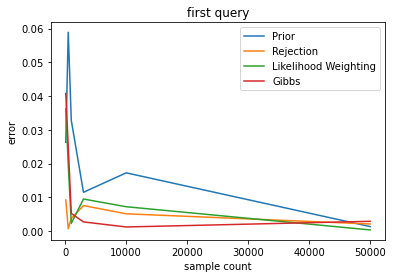

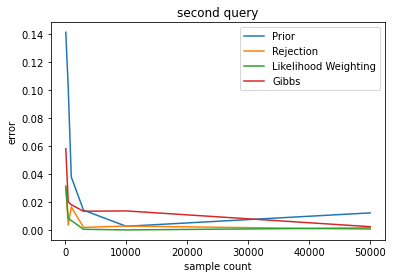

In [152]:
plot_data()

For Gibbs sampling, try different burnin values and report the accuracy (or error).

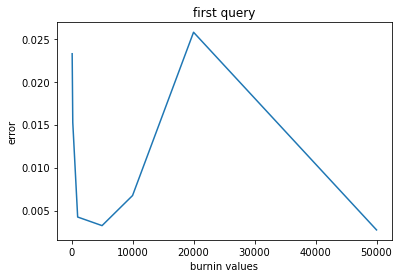

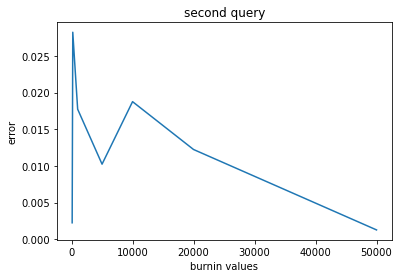

In [161]:
BURNIN_VALUES = [100, 200, 1000, 5000, 10000, 20_000, 50_000]
FIRST_QUERY_BURNIN = []
SECOND_QUERY_BURNIN = []
def test_different_burnin_values():
    for burnin in BURNIN_VALUES:
        prob = bayes_net.sampling(('f',True), [('a', True),('e', False)], 'Gibbs', 2000, burnin) 
        FIRST_QUERY_BURNIN.append(np.abs(prob - FIRST_QUERY_PROB))
        prob = bayes_net.sampling( ('c',False), [('f',True),('d',False)], 'Gibbs', 2000, burnin) 
        SECOND_QUERY_BURNIN.append(np.abs(prob - SECOND_QUERY_PROB))
    plot_burnins('first query', FIRST_QUERY_BURNIN)
    plot_burnins('second query', SECOND_QUERY_BURNIN)
    
def plot_burnins(name, values):
    plt.plot(BURNIN_VALUES, values)
    plt.title(name)
    plt.xlabel('burnin values')
    plt.ylabel('error')
    plt.show()

test_different_burnin_values()

In [ ]:
# extra space

In [ ]:
# extra space

# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

## Data

In [ ]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

In [ ]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

In [ ]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

In [ ]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

## Functions

In [ ]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [ ]:
tower_records

[([994, -36], [873, -28], [958, 70], [1077, -128]),
 ([1053, 63], [926, 26], [961, 110], [905, 82]),
 ([956, 389], [1106, 499], [1005, 397], [901, 326]),
 ([331, 1227], [377, 1232], [270, 1282], [232, 1051]),
 ([520, 1376], [577, 1446], [397, 1456], [648, 1364])]

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'),cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes: (2 points)

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1
    f, d = (coor[0] - prev_coor[0], coor[1] - prev_coor[1])
    return (
        0.5 * scipy.stats.expon.pdf(np.abs(f), scale=moving_model['X_STEP']),
        scipy.stats.expon.pdf(d, scale=moving_model['Y_STEP'])
    )

    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    return (
        scipy.stats.norm(coor[0], tower_std).pdf(tower_coor[0]),
        scipy.stats.norm(coor[1], tower_std).pdf(tower_coor[1])
    )
    
    
def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    return np.prod([
        P_towerCoor_given_coor(rec[i], info['std'], coor)
        for i, info in enumerate(towers_info.values())
    ], axis=0)

In [ ]:
# extra space

In [ ]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [ ]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 30, 5
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]

        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [ ]:
def gradient(func, coors):

    epsilon = 1E-1
    grads = []
    coors = coors.tolist()

    for i, coor in enumerate(coors):
        grad = []
        for idx in range(len(coor)):
            x_ = coor.copy()
            x_[idx] += epsilon
                
            coors_ = coors.copy()
            coors_[i] = x_
            grad.append((func(coors_, idx) - func(coors, idx)) / epsilon)

        grads.append(grad)
    return np.array(grads)


def gradiant_descent(
    func, initial_point, learning_rate: float = 5, max_iterations: int = 1000
):
    x = np.array(initial_point, dtype=np.float_).copy()
    for _ in range(max_iterations):
        prev_x = x.copy()
        x -= learning_rate * gradient(func, x)
        if np.array_equal(x, prev_x):
            break

    return x

def estimation_func(coors, idx):
    n = len(coors)
    np_input = list()
    for i in range(n - 1, -1, -1):
        np_input.append(P_record_given_coor(tower_records[i], coors[i], towers_info)[idx])
        
    for i in range(n - 1, 0, -1):
        np_input.append(P_coor_given_prevCoor(coors[i], coors[i - 1])[idx])
    
    np_input.append(P_coor0(coors[0]))
    return - np.sum(np.log(np_input))
      

def estimate(time, interval=None, learning_rate=5):
    if not interval:
        interval = 0
    
    coors_estimations = (coor0_estimations, coor1_estimations, coor2_estimations, coor3_estimations)
    prev_coors = (estimations[-1] for estimations in coors_estimations[:time])

    mean_x, mean_y = get_mean_towers_coor(time, tower_records)
    coor = mean_x - interval, mean_y - interval

    coors = list(prev_coors) + list((coor,))
    best_coors = gradiant_descent(estimation_func, coors, learning_rate)
    
    assert time == len(best_coors) - 1
    return best_coors

def print_estimation(coors):
    for i, coor in enumerate(coors):
        print(
            f'real_coor{i}: {real_coor(i)} - Estimated_coor{i}: {coor[0], coor[1]}',
            f'Estimation_error: {dist((coor[0], coor[1]), real_coor(i))}',
            sep='\n'
        )
        print()

In [ ]:
best_coors = estimate(time=0, interval=0, learning_rate=0.85)

coor0_estimations.append(best_coors[0])

print_estimation(best_coors)

real_coor0: (1087, -57) - Estimated_coor0: (1091.1362449867283, -48.42441165955036)
Estimation_error: 10



#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)


max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
         for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                    
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]
                
                P_rec1_given_x1, P_rec1_given_y1 = P_record_given_coor(rec1, coor1, towers_info)
                P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec1, coor0, towers_info)
                P_x1_given_x0, P_y1_given_y0 = P_coor_given_prevCoor(coor1, coor0)
                P_c0 = P_coor0(coor0)
    
                Px = P_rec1_given_x1 * P_rec0_given_x0 * P_x1_given_x0 * P_c0
                Py = P_rec1_given_y1 * P_rec0_given_y0 * P_y1_given_y0 * P_c0

                if Px > max_Px:
                    best_x0 = x0
                    best_x1 = x1
                    max_Px = Px

                if Py > max_Py:
                    best_y0 = y0
                    best_y1 = y1
                    max_Py = Py
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [ ]:
# extra space

In [ ]:
"""
argmax P(rec1|coor1) * P(rec0|coor0) * P(coor1 | coor0) * P(coor0)
"""

best_coors = estimate(time=1, interval=0, learning_rate=1.9)

coor0_estimations.append(best_coors[0])
coor1_estimations.append(best_coors[1])

print_estimation(best_coors)

real_coor0: (1087, -57) - Estimated_coor0: (1091.4993486456258, -48.276807505299026)
Estimation_error: 10

real_coor1: (1045, 72) - Estimated_coor1: (980.0026958054827, 69.56139172884494)
Estimation_error: 65



In [ ]:
# extra space

#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [ ]:
"""
argmax P(rec2|coor2) * P(rec1|coor1) * P(rec0|coor0) * 
P(coor2|coor1) * P(coor1 | coor0) * P(coor0)
"""

best_coors = estimate(time=2, interval=0, learning_rate=1.7)

coor0_estimations.append(best_coors[0])
coor1_estimations.append(best_coors[1])
coor2_estimations.append(best_coors[2])

print_estimation(best_coors)

real_coor0: (1087, -57) - Estimated_coor0: (1091.4993562469429, -48.27680441531354)
Estimation_error: 10

real_coor1: (1045, 72) - Estimated_coor1: (983.3359276544292, 71.09642483818386)
Estimation_error: 62

real_coor2: (967, 393) - Estimated_coor2: (980.1643988637811, 392.1114323198982)
Estimation_error: 13



In [ ]:
# extra space

In [ ]:
# extra space

#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [ ]:
"""
argmax P(rec3|coor3) * P(rec2|coor2) * P(rec1|coor1)* P(rec0|coor0) *
P(coor3|coor2) * P(coor2|coor1) * P(coor1 | coor0) * P(coor0)
"""

best_coors = estimate(time=3, interval=0, learning_rate=3)

coor0_estimations.append(best_coors[0])
coor1_estimations.append(best_coors[1])
coor2_estimations.append(best_coors[2])
coor3_estimations.append(best_coors[3])

print_estimation(best_coors)

real_coor0: (1087, -57) - Estimated_coor0: (1091.4993562474388, -48.27680441510933)
Estimation_error: 10

real_coor1: (1045, 72) - Estimated_coor1: (982.7799315061205, 71.76139666432927)
Estimation_error: 62

real_coor2: (967, 393) - Estimated_coor2: (972.6318165565809, 389.7256170226105)
Estimation_error: 7

real_coor3: (314, 1220) - Estimated_coor3: (305.63018364392235, 1193.4234098812467)
Estimation_error: 28



In [ ]:
# extra space

In [ ]:
# extra space

As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.